## Imports

In [22]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
import numpy as np

In [2]:
tqdm.pandas()

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/semcovici/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Definitions

In [4]:
path_raw_data = '../data/raw/'

In [5]:
# choose the corpus for the analysis
corpus = 'ig'

## Read Data

In [6]:
# read data
data = pd.read_csv(
    path_raw_data + f'r3_{corpus}_test_users.csv', 
    sep = ';', 
    encoding='utf-8-sig'
    )

In [7]:
data.head()

User_ID                                           Timeline  \
0  r2_ig_2  @ ta fzd oq # uma amiga minha tava na rua quan...   
1  r2_ig_3  @ Ola Como ta # Vamo Seguir @ estamos querendo...   
2  r2_ig_5  papai me deu um irmão lindo desse # cansada de...   
3  r2_ig_6  Né primeiro de abril não ta # Pena que um pais...   
4  r2_ig_9  já acordei nun desânimo que pqp # vontade de n...   

                                              Stance Polarity  Tweet_Seq  
0        nao me diz que isso é de igreja católica pf  against       1874  
1  Se a igreja faz isso ela devia ser isenta mesm...  against       3988  
2  que pena então, por que se cada espírita for r...  against       4532  
3                             bglh é entrar p igreja      for       2661  
4  já vou levar pra igreja pra Deus benzer pq o q...      for       1441

## analysis

### Basic describe

In [12]:
# % of observations per label
data.Polarity.value_counts() / len(data) 

Polarity
against    0.565943
for        0.434057
Name: count, dtype: float64

In [13]:
# question: there is nan data?
print('len data with nan: ', data.shape)
print('len data without nan: ', data.dropna().shape)

len data with nan:  (599, 5)
len data without nan:  (599, 5)


In [14]:
# question: there is rows completely duplicated?
print('len data with duplicates: ', data.shape)
print('len data without duplicates: ', data.drop_duplicates().shape)

len data with duplicates:  (599, 5)
len data without duplicates:  (599, 5)


In [15]:
# question: there is rows with duplicated texts?
print('len data with duplicates: ', data['Texts'].shape)
print('len data without duplicates: ', data['Texts'].drop_duplicates().shape)

KeyError: 'Texts'

In [16]:
# question: where is the duplicated texts?
data[data.duplicated(subset=['Texts'])].sort_values('Texts')

KeyError: Index(['Texts'], dtype='object')

In [13]:
# question: there is duplicated users?
print('len data with duplicates: ', data['User_ID'].shape)
print('len data without duplicates: ', data['User_ID'].drop_duplicates().shape)

len data with duplicates:  (1796,)
len data without duplicates:  (1796,)


In [14]:
# create the dataset to analysis
## remove the rows who have duplicated texts
data_2_anl = data.drop_duplicates(subset=['Texts'])
data_2_anl

User_ID Polarity                                              Texts
0        r2_ig_1  against  PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Cheer...
1        r2_ig_4      for  Golaço!!!!!!!!! # Manda geral do time principa...
2        r2_ig_7  against  @gabycunha86 Amanhã vou aí, deixa pra terça # ...
3        r2_ig_8      for  3.4- O Centro de Coordenação da Operação está ...
4       r2_ig_10      for  Me arrependi de excluir meu outro tt, agora ti...
...          ...      ...                                                ...
1790  r2_ig_2395  against  ontem a rafaela me abandonou e eu fui pro omeg...
1792  r2_ig_2398  against  Em todos os 0 estados dos EUA a partir de hoje...
1793  r2_ig_2399  against  isso daqui so eu jogando prime 0 # se rolar ví...
1794  r2_ig_2400  against  @amndwz_ nao acredito! # @amndwz_ MUDANÇA # @a...
1795  r2_ig_2402  against  @bmazzeo Vamos mudar isso, Bruno! Estamos espe...

[1522 rows x 3 columns]

In [15]:
#number of observations per label
data_2_anl.Polarity.value_counts() / len(data)

Polarity
against    0.461024
for        0.386414
Name: count, dtype: float64

### numerical analysis of length of texts

In [16]:
# create an list of the texts in 'Texts'
data_2_anl['list_texts'] = data_2_anl.Texts.progress_apply(lambda x: x.split(' # '))
data_2_anl.head()

 37%|███▋      | 561/1522 [00:00<00:00, 1606.92it/s]

100%|██████████| 1522/1522 [00:00<00:00, 1592.67it/s]
/tmp/ipykernel_176271/1561259299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_anl['list_texts'] = data_2_anl.Texts.progress_apply(lambda x: x.split(' # '))


User_ID Polarity                                              Texts  \
0   r2_ig_1  against  PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Cheer...   
1   r2_ig_4      for  Golaço!!!!!!!!! # Manda geral do time principa...   
2   r2_ig_7  against  @gabycunha86 Amanhã vou aí, deixa pra terça # ...   
3   r2_ig_8      for  3.4- O Centro de Coordenação da Operação está ...   
4  r2_ig_10      for  Me arrependi de excluir meu outro tt, agora ti...   

                                          list_texts  
0  [PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Chee...  
1  [Golaço!!!!!!!!!, Manda geral do time principa...  
2  [@gabycunha86 Amanhã vou aí, deixa pra terça, ...  
3  [3.4- O Centro de Coordenação da Operação está...  
4  [Me arrependi de excluir meu outro tt, agora t...

In [17]:
# count the texts in 'Texts'
data_2_anl['n_texts'] = data_2_anl.list_texts.progress_apply(lambda x: len(x))
data_2_anl.head()

100%|██████████| 1522/1522 [00:00<00:00, 844408.82it/s]
/tmp/ipykernel_176271/1769049565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_anl['n_texts'] = data_2_anl.list_texts.progress_apply(lambda x: len(x))


User_ID Polarity                                              Texts  \
0   r2_ig_1  against  PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Cheer...   
1   r2_ig_4      for  Golaço!!!!!!!!! # Manda geral do time principa...   
2   r2_ig_7  against  @gabycunha86 Amanhã vou aí, deixa pra terça # ...   
3   r2_ig_8      for  3.4- O Centro de Coordenação da Operação está ...   
4  r2_ig_10      for  Me arrependi de excluir meu outro tt, agora ti...   

                                          list_texts  n_texts  
0  [PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Chee...      878  
1  [Golaço!!!!!!!!!, Manda geral do time principa...      533  
2  [@gabycunha86 Amanhã vou aí, deixa pra terça, ...      956  
3  [3.4- O Centro de Coordenação da Operação está...     1153  
4  [Me arrependi de excluir meu outro tt, agora t...       91

In [18]:
# create tokens in each text in 'Texts'
data_2_anl['list_texts_tokens'] = data_2_anl.list_texts.progress_apply(lambda x: [word_tokenize(text, language='portuguese') for text in x])
data_2_anl.head()

100%|██████████| 1522/1522 [03:39<00:00,  6.92it/s]
/tmp/ipykernel_176271/279838040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_anl['list_texts_tokens'] = data_2_anl.list_texts.progress_apply(lambda x: [word_tokenize(text, language='portuguese') for text in x])


User_ID Polarity                                              Texts  \
0   r2_ig_1  against  PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Cheer...   
1   r2_ig_4      for  Golaço!!!!!!!!! # Manda geral do time principa...   
2   r2_ig_7  against  @gabycunha86 Amanhã vou aí, deixa pra terça # ...   
3   r2_ig_8      for  3.4- O Centro de Coordenação da Operação está ...   
4  r2_ig_10      for  Me arrependi de excluir meu outro tt, agora ti...   

                                          list_texts  n_texts  \
0  [PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Chee...      878   
1  [Golaço!!!!!!!!!, Manda geral do time principa...      533   
2  [@gabycunha86 Amanhã vou aí, deixa pra terça, ...      956   
3  [3.4- O Centro de Coordenação da Operação está...     1153   
4  [Me arrependi de excluir meu outro tt, agora t...       91   

                                   list_texts_tokens  
0  [[PQP, ESSE, DORAMA, É, MUITO, FOADA, (, Sassy...  
1  [[Golaço, !, !, !, !, !, !, !, !, !], [Manda, ...  
2  [[@, gabycunha86, Amanhã, vou, aí, ,, deixa, p...  
3  [[3.4-, O, Centro, de, Coordenação, da, Operaç...  
4  [[Me, arrependi, de, excluir, meu, outro, tt, ...

In [19]:
# count tokens in each text in 'Texts'
data_2_anl['list_texts_len'] = data_2_anl.list_texts_tokens.progress_apply(lambda x: [len(text) for text in x])
data_2_anl.head()

 52%|█████▏    | 786/1522 [00:00<00:00, 7848.11it/s]

100%|██████████| 1522/1522 [00:00<00:00, 7407.00it/s]
/tmp/ipykernel_176271/4170615992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_anl['list_texts_len'] = data_2_anl.list_texts_tokens.progress_apply(lambda x: [len(text) for text in x])


User_ID Polarity                                              Texts  \
0   r2_ig_1  against  PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Cheer...   
1   r2_ig_4      for  Golaço!!!!!!!!! # Manda geral do time principa...   
2   r2_ig_7  against  @gabycunha86 Amanhã vou aí, deixa pra terça # ...   
3   r2_ig_8      for  3.4- O Centro de Coordenação da Operação está ...   
4  r2_ig_10      for  Me arrependi de excluir meu outro tt, agora ti...   

                                          list_texts  n_texts  \
0  [PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Chee...      878   
1  [Golaço!!!!!!!!!, Manda geral do time principa...      533   
2  [@gabycunha86 Amanhã vou aí, deixa pra terça, ...      956   
3  [3.4- O Centro de Coordenação da Operação está...     1153   
4  [Me arrependi de excluir meu outro tt, agora t...       91   

                                   list_texts_tokens  \
0  [[PQP, ESSE, DORAMA, É, MUITO, FOADA, (, Sassy...   
1  [[Golaço, !, !, !, !, !, !, !, !, !], [Manda, ...   
2  [[@, gabycunha86, Amanhã, vou, aí, ,, deixa, p...   
3  [[3.4-, O, Centro, de, Coordenação, da, Operaç...   
4  [[Me, arrependi, de, excluir, meu, outro, tt, ...   

                                      list_texts_len  
0  [31, 12, 8, 9, 31, 17, 15, 13, 20, 14, 19, 5, ...  
1  [10, 7, 8, 11, 5, 5, 8, 6, 4, 3, 13, 8, 7, 9, ...  
2  [9, 5, 11, 4, 12, 13, 2, 25, 10, 7, 12, 5, 7, ...  
3  [50, 23, 39, 16, 13, 9, 43, 53, 19, 48, 41, 27...  
4  [14, 9, 4, 11, 9, 23, 19, 13, 9, 19, 10, 24, 2...

[Text(0.5, 1.0, 'number of comments of friends per user'),
 Text(0.5, 0, 'number of comments')]

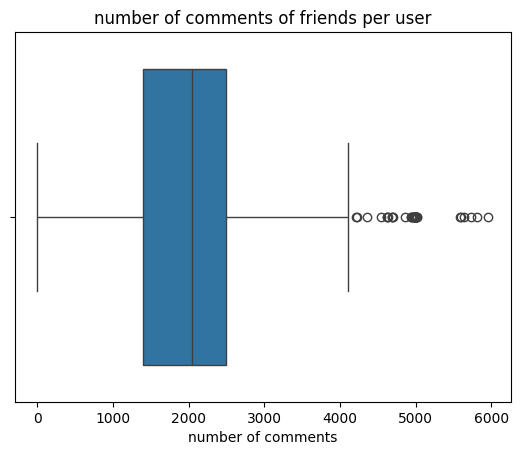

In [20]:
sns.boxplot(
    data=data_2_anl,
    x="n_texts"
    ).set(
        title='number of comments of friends per user',
        xlabel='number of comments'
    )

[Text(0.5, 1.0, 'number of comments of friends per user'),
 Text(0.5, 0, 'number of comments')]

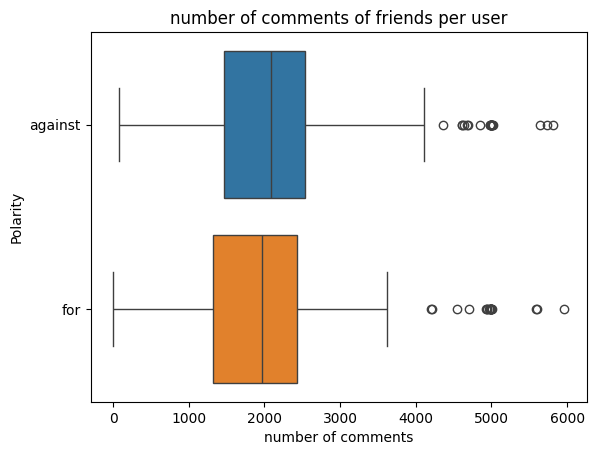

In [21]:
sns.boxplot(
    data=data_2_anl,
    x="n_texts",
    y='Polarity',
    hue='Polarity'
    ).set(
        title='number of comments of friends per user',
        xlabel='number of comments'
    )

In [22]:
list_for_n_tks = []
list_against_n_tks = []
for idx, row in tqdm(data_2_anl.iterrows(), total = len(data_2_anl)):
    
    label = row['Polarity']
    list_texts_len = row['list_texts_len']
    
    if label == 'for':
        list_for_n_tks += list_texts_len
    elif label == 'against':
        list_against_n_tks += list_texts_len

100%|██████████| 1522/1522 [00:00<00:00, 16200.84it/s]


[Text(0.5, 1.0, 'number of token in comments by polarity'),
 Text(0.5, 0, 'number of tokens')]

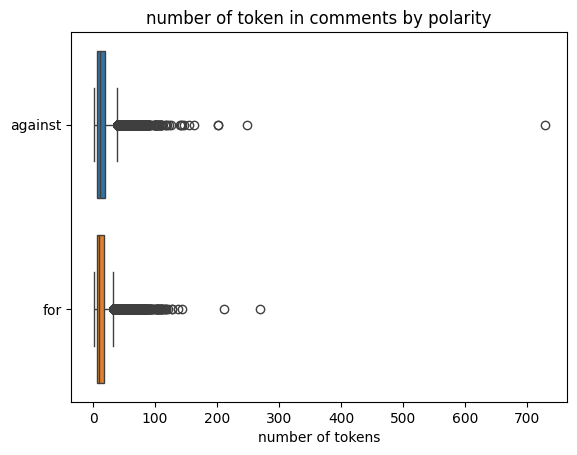

In [23]:
sns.boxplot(
    data={'against': list_against_n_tks, 'for': list_for_n_tks},
    orient = 'h',
    ).set(
        title='number of token in comments by polarity',
        xlabel='number of tokens'
    )

[Text(0.5, 1.0, 'number of token in comments by polarity (without outliers)'),
 Text(0.5, 0, 'number of tokens')]

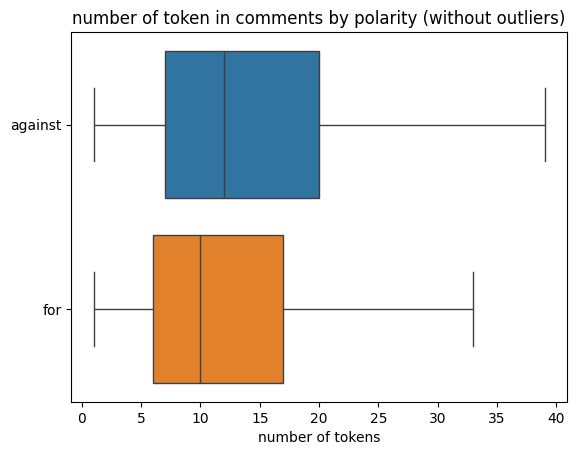

In [24]:
sns.boxplot(
    data={'against': list_against_n_tks, 'for': list_for_n_tks},
    orient = 'h',
    showfliers = False
    ).set(
        title='number of token in comments by polarity (without outliers)',
        xlabel='number of tokens'
    )